# Décodage d'une formule de pricing

Le challenge consiste à déterminer l’équation ou l’algorithme permettant de calculer les prix d’une couverture d’assurance automobile.

https://www.datascience.net/fr/challenge/26/details

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Train data

In [5]:
train = pd.read_csv("data/ech_apprentissage.csv", sep = ';', index_col = 'id', low_memory = False)
X = train.drop('prime_tot_ttc', axis = 1)

print(X.shape)
# print(X.head())

(300000, 32)


## Test data

In [6]:
X_test = pd.read_csv('data/ech_test.csv', sep = ';', index_col = 'id', low_memory = False)

print(X_test.shape)
# X_test.head()

(30000, 32)


## Target

count    300000.000000
mean        346.063566
std         119.870510
min          94.780000
25%         262.050000
50%         323.220000
75%         407.500000
max        1518.810000
Name: prime_tot_ttc, dtype: float64


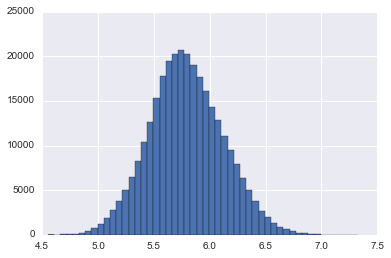

In [7]:
y = train.prime_tot_ttc

print(y.describe())
np.log(y).hist(bins=50);

## Features


* [annee_naissance](#annee_naissance)
* [annee_permis](#annee_permis)
* [marque](#marque)
* [puis_fiscale](#puis_fiscale)
* [anc_veh](#anc_veh)
* [codepostal](#codepostal)
* [energie_veh](#energie_veh)
* [kmage_annuel](#kmage_annuel)
* [crm](#crm)
* [profession](#profession)
* [var1](#var1)
* [var2](#var2)
* [var3](#var3)
* [var4](#var4)
* [var5](#var5)
* [var6](#var6)
* [var7](#var7)
* [var8](#var8)
* [var9](#var9)
* [var10](#var10)
* [var11](#var11)
* [var12](#var12)
* [var13](#var13)
* [var14](#var14)
* [var15](#var15)
* [var16](#var16)
* [var17](#var17)
* [var18](#var18)
* [var19](#var19)
* [var20](#var20)
* [var21](#var21)
* [var22](#var22)
* [age_permis](#age_permis)

In [8]:
df = pd.concat([X, X_test], axis=0)

In [9]:
# df.dtypes

### `annee_naissance`

Год рождения.

In [10]:
df.annee_naissance.describe()

count    329693.000000
mean       1983.684949
std           6.563537
min        1925.000000
25%        1980.000000
50%        1985.000000
75%        1989.000000
max        1998.000000
Name: annee_naissance, dtype: float64

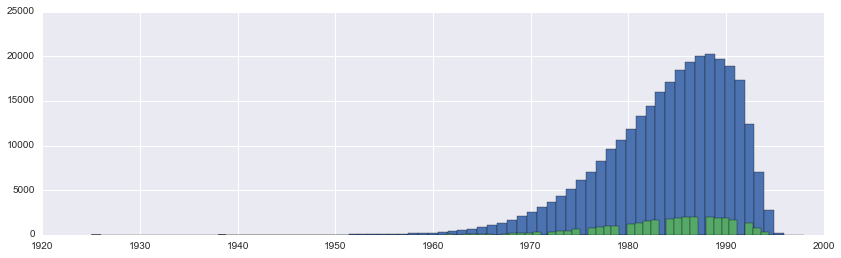

In [11]:
# X.groupby(['annee_naissance'])['annee_naissance'].count()
plt.figure(figsize=(14, 4))
X.annee_naissance.hist(bins = 72);
X_test.annee_naissance.hist(bins = 72);

### `annee_permis`

Год получения прав.

In [12]:
df.annee_permis.describe()

count    329693.000000
mean       2003.050847
std           6.590561
min        1944.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        2018.000000
Name: annee_permis, dtype: float64

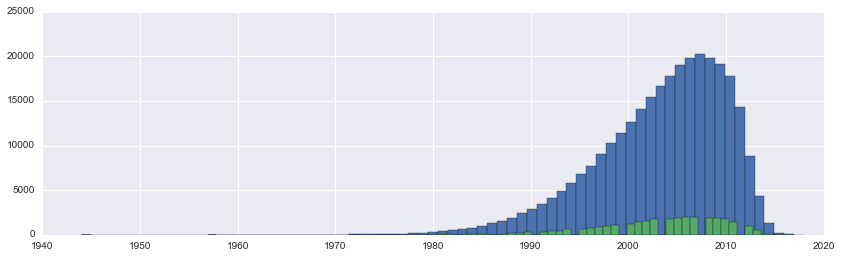

In [13]:
# X.groupby(['annee_permis'])['annee_permis'].count()
plt.figure(figsize=(14, 4))
X.annee_permis.hist(bins = 73);
X_test.annee_permis.hist(bins = 73);

### `age_permis`

Добавим фичу `age_permis` — возраст, в котором были получены права.

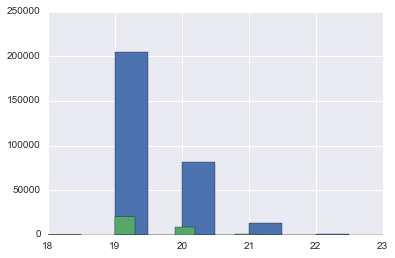

In [14]:
X['age_permis'] = X.annee_permis - X.annee_naissance
X.age_permis.hist();

X_test['age_permis'] = X_test.annee_permis - X_test.annee_naissance
X_test.age_permis.hist();

### `marque`

In [15]:
np.sort(df.marque.unique())

array(['ACMA', 'ALFA ROMEO', 'ALPINE RENAULT', 'AMC', 'AMPHICAR', 'ARO',
       'ASIA', 'ASTON MARTIN', 'AUDI', 'AUSTIN', 'AUSTIN-HEALEY',
       'AUTO-UNION', 'AUTOBIANCHI', 'AUTOLAND', 'AUVERLAND', 'BEDFORD',
       'BENTLEY', 'BERTONE', 'BMW', 'BREMACH', 'BRM', 'BUICK', 'CADILLAC',
       'CARBODIES', 'CATERHAM', 'CHENARD ET WALKER', 'CHEVROLET',
       'CHEYENNE', 'CHRYSLER', 'CITROEN', 'COURNIL', 'DACIA', 'DAEWOO',
       'DAF', 'DAIHATSU', 'DAIMLER', 'DANGEL', 'DATSUN', 'DE LOREAN',
       'DELAHAYE', 'DETHLEFFS', 'DODGE', 'DONKERVOORT', 'EAGLE', 'EBRO',
       'EBS', 'ENGIN LOISIRS', 'ENGIN SPECIAL', 'ENGIN TRAVAUX PUBLIC',
       'FERRARI', 'FIAT', 'FORD', 'FSO', 'GEELY', 'GMC', 'GME', 'GRANDIN',
       'HANOMAG', 'HONDA', 'HOTCHKISS', 'HUMMER', 'HYUNDAI', 'INFINITI',
       'INTERNATIONAL', 'ISUZU', 'IVECO', 'JAGUAR', 'JEEP', 'JIDE', 'KIA',
       'LADA', 'LAFER', 'LAMBORGHINI', 'LANCIA', 'LAND-ROVER', 'LDV',
       'LEXUS', 'LINCOLN', 'LOHR', 'LORENZ', 'LOTUS', 'MAHINDRA', 'M

### `puis_fiscale`

Налоговая ставка (на мощность двигателя машины). Зависит от года выпуска машины, лошадей и эмиссии CO2. Обратной силы до 1998 не имеет.

count    330000.000000
mean          6.821433
std           2.634030
min           0.000000
25%           5.000000
50%           6.000000
75%           8.000000
max          58.000000
Name: puis_fiscale, dtype: float64


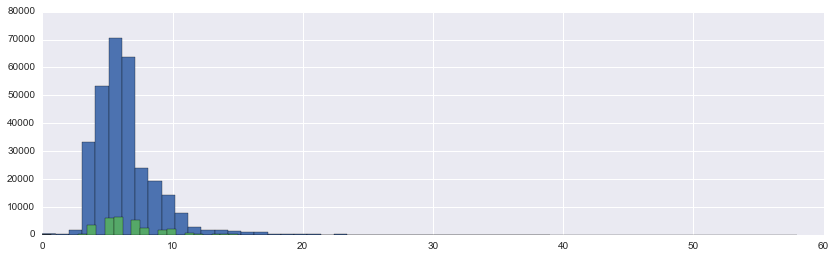

In [16]:
print(df.puis_fiscale.describe());
plt.figure(figsize = (14,4))
X.puis_fiscale.hist(bins = 57);
X_test.puis_fiscale.hist(bins = 57);

In [17]:
# df[df.puis_fiscale > 40]
df[df.puis_fiscale > 50]

,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,profession,...,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22
id,,,,,,,,,,,,,,,,,,,,,
47565,1944.0,1963.0,BENTLEY,51,4,14174,essence,14418,50,"enseignant, formateur, chercheur",...,2,F,0,1,3,31,2,1,1,0
74678,1933.0,1952.0,BENTLEY,54,1,24465,essence,17000,55,"enseignant, formateur, chercheur",...,4,F,0,1,2,22,0,0,1,1
162064,1932.0,1951.0,BENTLEY,51,1,54482,essence,14418,50,"agent, employe",...,2,B,3,1,1,29,0,0,0,2
182182,1936.0,1955.0,FERRARI,58,40,62498,essence,12296,50,profession liberale,...,2,A,2,4,1,23,0,0,1,3
220841,1937.0,1956.0,AUDI,51,34,75109,essence,13366,50,"cadre, ingenieur",...,4,G,2,4,4,24,0,1,0,3
240427,1925.0,1944.0,FERRARI,58,4,78650,essence,12296,50,"enseignant, formateur, chercheur",...,2,G,0,1,1,15,0,1,1,1
254274,1947.0,1967.0,BENTLEY,51,2,83137,essence,14418,50,"enseignant, formateur, chercheur",...,2,A,0,1,2,23,0,1,1,1
279724,1942.0,1961.0,BENTLEY,51,2,92051,essence,14543,50,"enseignant, formateur, chercheur",...,2,G,1,1,2,21,0,0,1,2
299719,1943.0,1963.0,ROLLS ROYCE,53,3,97107,essence,14954,50,"enseignant, formateur, chercheur",...,4,N,0,1,1,20,0,1,1,1


### `anc_veh`

Возраст машины.

count    330000.000000
mean         16.206209
std          24.699703
min           0.000000
25%           1.000000
50%           2.000000
75%          31.000000
max          99.000000
Name: anc_veh, dtype: float64


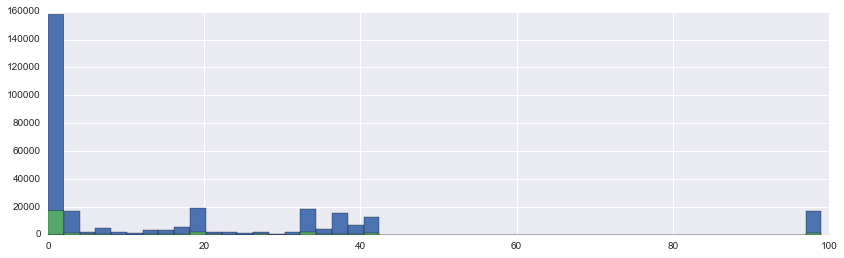

In [18]:
print(df.anc_veh.describe())
plt.figure(figsize = (14, 4))
X.anc_veh.hist(bins = 49);
X_test.anc_veh.hist(bins = 49);

In [19]:
# df[df.anc_veh == 99]
df[df.anc_veh == 99].shape

(18527, 32)

### `codepostal`

Почтовый индекс.

In [31]:
X.codepostal.value_counts().head()

13001    2606
6088     2295
31555    2275
35238    1992
20004    1932
Name: codepostal, dtype: int64

In [32]:
X_test.codepostal.value_counts().head()

1034     9723
97411    2820
97415    1965
97422    1520
97416    1405
Name: codepostal, dtype: int64

### `energie_veh`

gazole             181651
essence            139528
gpl                  7229
hybride essence       854
NR                    430
electricite           308
Name: energie_veh, dtype: int64


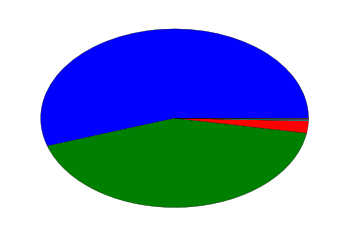

In [22]:
print(df.energie_veh.value_counts())
plt.pie(df.energie_veh.value_counts());

### `kmage_annuel`

* кластеризовать (сделать новую переменную)

count    330000.000000
mean       7363.165261
std        3086.819353
min         282.000000
25%        6387.000000
50%        6928.000000
75%        7467.000000
max       17102.000000
Name: kmage_annuel, dtype: float64


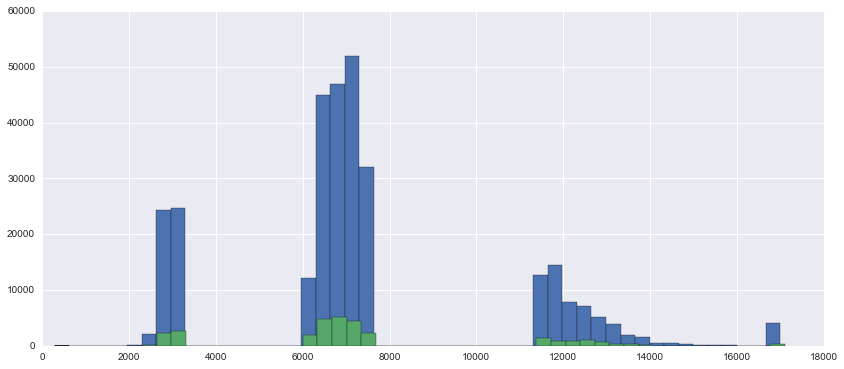

In [23]:
print(df.kmage_annuel.describe())

plt.figure(figsize=(14, 6));
X.kmage_annuel.hist(bins = 50);
X_test.kmage_annuel.hist(bins = 50);

In [27]:
df[df.kmage_annuel >= 17000].sort_values(by="kmage_annuel")

,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,profession,...,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22
id,,,,,,,,,,,,,,,,,,,,,
213,1987.0,2006.0,TOYOTA,5,2,1034,gazole,17000,50,"enseignant, formateur, chercheur",...,5,N,2,1,1,33,2,1,1,0
213202,1983.0,2002.0,CITROEN,6,2,72315,gazole,17000,95,"enseignant, formateur, chercheur",...,5,F,1,1,1,27,0,0,0,1
213217,1981.0,2000.0,RENAULT,4,0,72319,essence,17000,50,"enseignant, formateur, chercheur",...,5,B,1,3,1,29,0,1,1,1
213242,1996.0,2015.0,CITROEN,2,1,72328,essence,17000,50,"enseignant, formateur, chercheur",...,5,B,0,1,1,21,0,1,1,2
213277,1986.0,2006.0,RENAULT,7,0,72329,gpl,17000,72,"enseignant, formateur, chercheur",...,5,B,3,3,1,21,1,0,1,0
213337,1992.0,2011.0,FIAT,3,4,72344,essence,17000,57,"enseignant, formateur, chercheur",...,5,B,1,1,4,23,1,0,1,0
213478,NaN,NaN,NR,0,1,73003,NR,17000,50,"enseignant, formateur, chercheur",...,5,F,0,1,2,23,0,0,1,1
213547,1982.0,2001.0,PEUGEOT,9,0,73008,essence,17000,50,"agent, employe",...,5,D,2,4,1,21,0,0,0,4
213571,1989.0,2009.0,VOLKSWAGEN,9,28,73008,essence,17000,100,technicien,...,5,D,1,3,1,24,0,0,1,1


In [28]:
from sklearn import cluster

In [29]:
kmage_annuel = pd.DataFrame(X['kmage_annuel'])

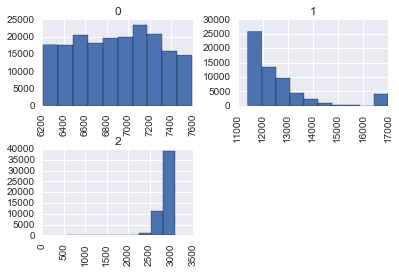

In [30]:
km_3 = cluster.KMeans(n_clusters=3)
km_3.fit(kmage_annuel)

plt.figure(figsize=(14,6))
kmage_annuel.hist(by=km_3.labels_);

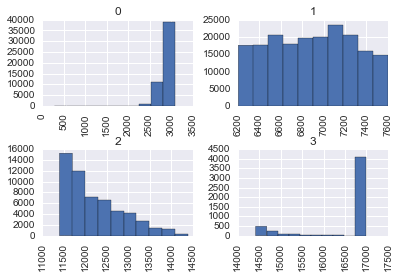

In [31]:
km_4 = cluster.KMeans(n_clusters=4)
km_4.fit(kmage_annuel)

plt.figure(figsize=(14,6))
kmage_annuel.hist(by=km_4.labels_);

In [29]:
sub_6928 = df[df.kmage_annuel == 6928]
sub_6387 = df[df.kmage_annuel == 6387]

print(sub_6928.shape)
print(sub_6387.shape)

(2559, 32)
(2905, 32)


In [28]:
sub_6928.marque.value_counts()

PEUGEOT       415
RENAULT       398
FIAT          343
ALFA ROMEO    294
CITROEN       291
LANCIA        123
MERCEDES      116
LADA           90
AUDI           87
OPEL           62
VOLKSWAGEN     61
HYUNDAI        53
FORD           47
TOYOTA         46
NISSAN         37
MITSUBISHI     29
CHEVROLET      25
MAZDA          17
DAEWOO         12
BMW             8
SAAB            3
DACIA           2
Name: marque, dtype: int64

In [30]:
sub_6387.marque.value_counts()

PEUGEOT       849
RENAULT       675
VOLKSWAGEN    590
CITROEN       152
FORD          106
AUDI           99
SUZUKI         64
SEAT           61
FIAT           59
MERCEDES       53
OPEL           49
SKODA          47
ROVER          32
NISSAN         16
BMW            15
MITSUBISHI     13
ARO             8
MAZDA           6
LANCIA          4
SUBARU          3
MG              2
ALFA ROMEO      1
DAEWOO          1
Name: marque, dtype: int64

### `crm`

Coefficient de Réduction Majoration (CRM), он же bonus malus, т.н. понижающий коэффициент за хорошее вождение. Не может быть меньше 0.5. [Source](http://www.direct-assurance.fr/assurance/assurance-auto/faq-auto/evolution-du-bonus-malus-@/view-161-dafaq.html)

Смело можно делить на `100.0` и получать реальное значение.
Раз CRM - это поправочный коэффициент, то на него можно делить и считать его отдельно от базовой ставки.

count    330000.000000
mean         73.345639
std          23.614768
min          50.000000
25%          50.000000
50%          68.000000
75%          95.000000
max         270.000000
Name: crm, dtype: float64


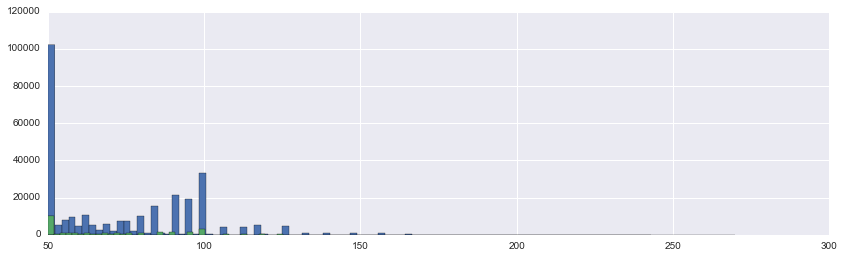

In [32]:
print(df.crm.describe())
plt.figure(figsize=(14,4))
X.crm.hist(bins = 100);
X_test.crm.hist(bins = 100);
# np.log(X.crm).hist();

In [33]:
# X.crm.value_counts()

### `profession`

Профессии:

* преподаватель, тренер, исследователь
* агент, сотрудник
* рамки, инженер
* техник
* педагог, ведущий, монитор
* Либеральная профессия
* работник
* работоискатель
* студент
* ремесленник
* профессия в области искусств и развлечений
* мужчина или женщина, у себя дома
* КоммерсантЪ
* Промежуточное профессия здравоохранения и социальной работы в 
* Лидер бизнеса
* Форман, мастерство агент
* оператор фермер

In [34]:
df.profession.value_counts()

enseignant, formateur, chercheur                             122484
agent, employe                                                83801
cadre, ingenieur                                              33151
technicien                                                    16730
educateur, animateur, moniteur                                14592
profession liberale                                           11475
ouvrier                                                       10065
demandeur d'emploi                                             7298
etudiant                                                       6266
artisan                                                        5580
profession de l'information des arts et des spectacles         5012
homme ou femme au foyer                                        4963
commercant                                                     2866
profession intermediaire de la sante et du travail social      2485
chef d'entreprise                               

### `var1`

Судя по всему, стаж вождения.

In [35]:
# pd.DataFrame([X.annee_naissance, X.age_permis, X.var1]).transpose()

In [36]:
# X.var1.isnull().sum()

# var1 = X.var1.fillna(0)

# X[var1 == 0]

# y[var1 == 0]

In [43]:
print(df.var1.isnull().sum())
print(df.var1.value_counts().sort_index())

307
-2.0         1
-1.0         3
 0.0        44
 1.0       229
 2.0      1394
 3.0      4857
 4.0      9834
 5.0     15682
 6.0     19529
 7.0     21048
 8.0     21772
 9.0     22295
 10.0    21692
 11.0    20951
 12.0    19569
 13.0    18465
 14.0    17012
 15.0    15565
 16.0    13865
 17.0    12456
 18.0    11281
 19.0    10003
 20.0     8527
 21.0     7473
 22.0     6440
 23.0     5305
 24.0     4499
 25.0     3795
 26.0     3186
 27.0     2670
         ...  
 38.0      208
 39.0      148
 40.0      124
 41.0       77
 42.0       62
 43.0       46
 44.0       46
 45.0       35
 46.0       22
 47.0       27
 48.0       15
 49.0       12
 50.0       15
 51.0        8
 52.0        7
 53.0        5
 54.0        4
 55.0        4
 56.0        5
 57.0        1
 58.0        2
 59.0        1
 60.0        2
 61.0        1
 62.0        1
 64.0        2
 65.0        1
 67.0        1
 69.0        1
 72.0        1
Name: var1, dtype: int64


In [3]:
df[df.var1 < 0]

NameError: name 'df' is not defined

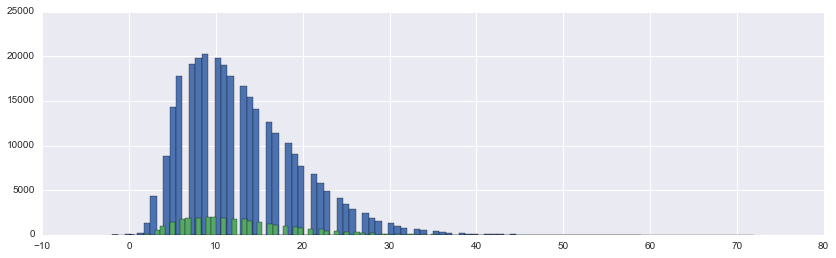

In [41]:
plt.figure(figsize = (14, 4))
X.var1.hist(bins = 100);
X_test.var1.hist(bins = 100);

### `var2`

In [28]:
print(df.var2.isnull().sum())
print(df.var2.value_counts())

0
4    72810
1    70810
5    60927
3    60417
2    59498
0     5538
Name: var2, dtype: int64


In [44]:
df[df.var2 == 0]

,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,profession,...,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22
id,,,,,,,,,,,,,,,,,,,,,
94,1984.0,2003.0,LAND-ROVER,8,1,1034,gazole,11541,50,"enseignant, formateur, chercheur",...,5,N,0,1,1,20,0,1,1,2
336,1971.0,1990.0,LAND-ROVER,8,1,1034,gazole,11541,50,"enseignant, formateur, chercheur",...,5,N,0,1,1,20,0,1,1,2
441,1987.0,2006.0,VOLKSWAGEN,4,2,1034,gazole,3098,68,"enseignant, formateur, chercheur",...,3,N,2,1,2,34,0,1,1,4
551,1988.0,2007.0,TOYOTA,9,1,1034,gazole,7483,69,"enseignant, formateur, chercheur",...,5,N,2,1,2,25,0,1,1,1
739,1987.0,2008.0,SUZUKI,9,3,1034,essence,6913,50,"enseignant, formateur, chercheur",...,5,N,0,1,1,34,0,1,1,3
839,1976.0,1995.0,CHRYSLER,13,2,1034,essence,11943,50,"enseignant, formateur, chercheur",...,2,N,1,1,1,24,0,0,1,1
855,1987.0,2007.0,CITROEN,11,4,1034,essence,7037,50,"enseignant, formateur, chercheur",...,5,N,2,1,1,24,0,1,1,3
962,1983.0,2002.0,CHRYSLER,13,2,1034,essence,11943,62,"enseignant, formateur, chercheur",...,2,N,1,1,1,24,0,1,1,3
995,1978.0,1998.0,CITROEN,11,4,1034,essence,7037,50,"enseignant, formateur, chercheur",...,5,N,2,1,1,22,0,1,1,2


### `var3`

In [29]:
print(df.var3.isnull().sum())
print(df.var3.value_counts())

0
372    187804
272    142196
Name: var3, dtype: int64


In [2]:
df[df.var3 == 372]

NameError: name 'df' is not defined

### `var4`

In [30]:
print(df.var4.isnull().sum())
print(df.var4.value_counts())

0
0    153696
1     61638
2     60989
3     24574
4      9557
5      9556
7      3896
6      3768
9      1744
8       582
Name: var4, dtype: int64


### `var5`

In [32]:
print(df.var5.isnull().sum())
print(df.var5.value_counts())

0
1    190549
2    139451
Name: var5, dtype: int64


### `var6`

In [33]:
print(df.var6.isnull().sum())
print(df.var6.value_counts())

0
B    127920
A     98693
C     83813
D     18978
N       596
Name: var6, dtype: int64


### `var7`

In [34]:
print(df.var7.isnull().sum())
print(df.var7.value_counts())

0
1     169758
3      35802
11     23368
10     23198
4      15106
5      13384
7       9921
8       9189
20      9099
2       8349
6       5007
12      2537
14      2253
13      1552
9        855
0        309
NR       307
50         5
30         1
Name: var7, dtype: int64


### `var8`

In [35]:
print(df.var8.isnull().sum())
print(df.var8.value_counts())

0
M1    101090
B2     74439
M2     58033
H1     25922
B1     25170
T3      8946
T2      7938
F       5915
K       4176
T1      3130
T4      3020
MC      2292
K2      2273
PU      1802
P3      1755
VA      1559
H2      1490
NR       604
TU       407
P1        16
P2        16
P4         5
B          1
K3         1
Name: var8, dtype: int64


### `var9`

In [38]:
print(df.var9.isnull().sum())
print(df.var9.value_counts().head(10))

0
90     30983
60     19426
75     19344
110    18560
115    11736
65     11205
100    10463
105     9473
70      9417
80      7871
Name: var9, dtype: int64


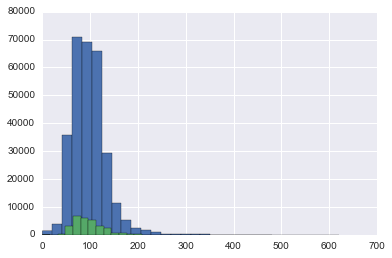

In [36]:
X.var9.hist(bins = 30);
X_test.var9.hist(bins = 30);

### `var10`

In [45]:
print(X.var10.isnull().sum())
print(X.var10.value_counts().head())

0
180    15769
170    12194
185    11967
175    11745
160    10974
Name: var10, dtype: int64


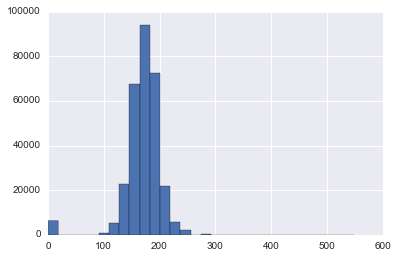

In [46]:
X.var10.hist(bins=30);

### `var11`

In [47]:
print(X.var11.isnull().sum())
print(X.var11.value_counts().head())

0
0     63845
2     49587
1     44320
99    16958
34    14497
Name: var11, dtype: int64


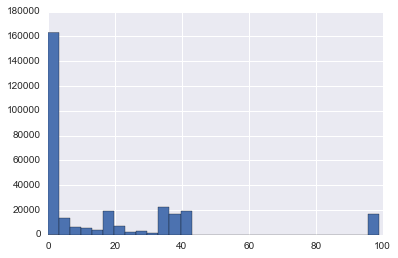

In [48]:
X.var11.hist(bins=30);

### `var12`

In [49]:
print(X.var12.isnull().sum())
print(X.var12.value_counts().head())

0
3211    4121
960     3512
890     3484
980     3384
1300    3224
Name: var12, dtype: int64


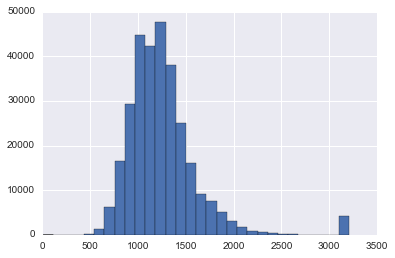

In [50]:
X.var12.hist(bins = 30);

### `var13`

In [51]:
print(X.var13.isnull().sum())
print(X.var13.value_counts())

0
5    180716
3     69632
4     29832
2     19820
Name: var13, dtype: int64


### `var14`

In [52]:
print(X.var14.isnull().sum())
print(X.var14.value_counts())

0
A    62469
B    62449
F    46276
G    45126
C    34351
D    32757
E    11505
N     5067
Name: var14, dtype: int64


### `var15`

In [54]:
print(X.var15.isnull().sum())
print(X.var15.value_counts())

0
0    107347
2     98212
1     55596
3     29408
4      6985
5      1662
6       537
7       147
8        78
9        28
Name: var15, dtype: int64


### `var16`

In [55]:
print(X.var16.isnull().sum())
print(X.var16.value_counts())

0
1     157270
4      99301
5      16958
3      16880
2       5917
0       3345
NR       329
Name: var16, dtype: int64


In [56]:
cat_variables.append('var16')

### `var17`

In [57]:
print(X.var17.isnull().sum())
print(X.var17.value_counts())

0
1    189634
2     69401
4     31959
3      7062
0      1789
5       155
Name: var17, dtype: int64


### `var18`

In [58]:
print(X.var18.isnull().sum())
print(X.var18.value_counts())

0
23    36281
22    34870
24    33843
25    29404
21    28001
26    25553
27    20606
28    15433
20    15372
29    11151
30     7953
31     6451
19     5720
32     4956
33     3925
34     3132
35     2401
36     1933
37     1724
38     1517
39     1155
14      797
13      756
15      675
12      644
40      572
16      551
11      545
18      480
17      472
10      433
9       348
8       289
41      281
7       273
4       241
5       230
6       230
3       193
1       150
2       144
42      132
0        90
43       55
44       31
45        7
Name: var18, dtype: int64


### `var19`

In [59]:
print(X.var19.isnull().sum())
print(X.var19.value_counts())

0
0     210146
1      47692
2      24855
3      10148
4       3978
5       1537
6        662
7        362
8        237
9        125
11        63
10        47
12        32
13        27
15        16
14        15
16        14
20        14
17         9
18         6
19         3
27         3
25         2
34         2
32         1
21         1
23         1
24         1
28         1
Name: var19, dtype: int64


### `var20`

In [15]:
print(df.var20.isnull().sum())
print(df.var20.value_counts())

0
1    175294
0    154706
Name: var20, dtype: int64


### `var21`

In [10]:
print(df.var21.isnull().sum())
print(df.var21.value_counts())

0
1    299079
0     30921
Name: var21, dtype: int64


### `var22`

In [11]:
print(df.var22.isnull().sum())
print(df.var22.value_counts())

0
0     126690
1     104232
2      61316
3      24108
4       8271
5       3037
6       1179
7        497
8        251
9        149
10       106
11        44
13        39
12        28
14        20
15         8
17         8
22         4
25         3
60         3
18         2
30         2
59         1
16         1
20         1
Name: var22, dtype: int64


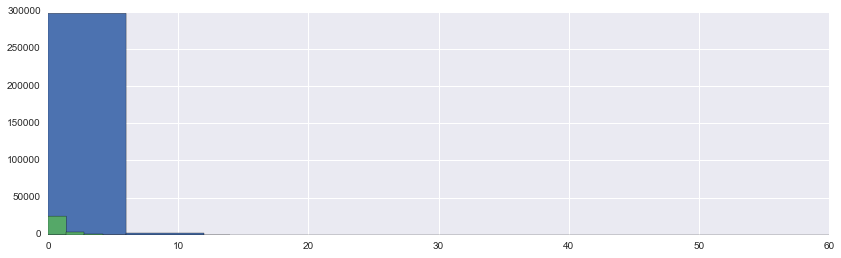

In [14]:
plt.figure(figsize = (14, 4))
X.var22.hist(bins = 10);
X_test.var22.hist(bins = 10);

-----

## Категориальные переменные

In [7]:
cat_variables = [i for i in df.columns if df[i].dtype == 'O']

print(cat_variables)

num_variables = [i for i in df.columns if df[i].dtype != 'O']

print(num_variables)

-------

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
encods = [LabelEncoder() for col in cat_variables]

for i, col in enumerate(cat_variables):
    X[col] = encods[i].fit_transform(X[col].astype(str))

encods = [LabelEncoder() for col in cat_variables]

for i, col in enumerate(cat_variables):
    X_test[col] = encods[i].fit_transform(X_test[col].astype(str))

In [66]:
X.fillna(0, inplace = True)
X_test.fillna(0, inplace = True)

---------

## Корреляции

In [24]:
df.corr()

,annee_naissance,annee_permis,puis_fiscale,anc_veh,kmage_annuel,crm,var1,var2,var3,var4,...,var11,var12,var13,var15,var17,var18,var19,var20,var21,var22
annee_naissance,1.000000,0.996143,-0.398639,0.019380,-0.226223,0.090048,-0.996143,0.001054,-0.012797,0.001607,...,0.019483,-0.211251,0.016517,-0.008414,0.004960,0.003789,0.002739,0.003463,0.003881,0.001245
annee_permis,0.996143,1.000000,-0.397199,0.019577,-0.225365,0.089981,-1.000000,0.000946,-0.013068,0.001531,...,0.019686,-0.210426,0.016416,-0.008516,0.005102,0.003490,0.002769,0.003800,0.003798,0.001299
puis_fiscale,-0.398639,-0.397199,1.000000,-0.048875,0.550662,-0.220577,0.397199,-0.006038,0.030855,-0.000201,...,-0.048911,0.502540,-0.049966,0.020973,0.001691,-0.002109,-0.002368,-0.002763,-0.004814,-0.000959
anc_veh,0.019380,0.019577,-0.048875,1.000000,-0.047073,0.194077,-0.019577,0.084763,-0.464505,0.001718,...,0.999000,-0.045668,-0.023700,-0.087719,-0.006501,0.006293,-0.000468,0.007906,0.002668,0.004622
kmage_annuel,-0.226223,-0.225365,0.550662,-0.047073,1.000000,-0.224395,0.225365,-0.026452,0.024888,0.001566,...,-0.046971,0.908860,0.211771,0.057796,0.000751,-0.005235,0.000025,0.001346,-0.002637,-0.000589
crm,0.090048,0.089981,-0.220577,0.194077,-0.224395,1.000000,-0.089981,0.142801,-0.087593,-0.000959,...,0.193985,-0.212965,-0.038970,-0.014027,0.003771,-0.007480,0.000659,0.002201,0.003727,-0.002629
var1,-0.996143,-1.000000,0.397199,-0.019577,0.225365,-0.089981,1.000000,-0.000946,0.013068,-0.001531,...,-0.019686,0.210426,-0.016416,0.008516,-0.005102,-0.003490,-0.002769,-0.003800,-0.003798,-0.001299
var2,0.001054,0.000946,-0.006038,0.084763,-0.026452,0.142801,-0.000946,1.000000,-0.075047,0.000438,...,0.084833,-0.029169,-0.024901,0.023020,0.000599,0.000517,-0.002665,-0.000222,0.002383,0.004090
var3,-0.012797,-0.013068,0.030855,-0.464505,0.024888,-0.087593,0.013068,-0.075047,1.000000,-0.002824,...,-0.465736,0.026255,0.024712,0.024436,0.000286,-0.001876,-0.002643,-0.003683,0.000446,-0.003142
var4,0.001607,0.001531,-0.000201,0.001718,0.001566,-0.000959,-0.001531,0.000438,-0.002824,1.000000,...,0.001792,0.001910,0.001447,-0.002747,0.001802,-0.002051,0.000607,-0.000943,-0.001894,0.000338


In [79]:
X.corrwith(y)

annee_naissance    0.053629
annee_permis       0.053594
marque             0.056387
puis_fiscale      -0.087858
anc_veh           -0.113175
codepostal         0.038251
energie_veh        0.067854
kmage_annuel       0.017368
crm                0.672603
profession         0.018608
var1              -0.158137
var2               0.082028
var3               0.070001
var4               0.137481
var5              -0.164251
var6              -0.014386
var7              -0.061064
var8               0.006371
var9              -0.017677
var10              0.095162
var11             -0.112625
var12             -0.055526
var13              0.051978
var14              0.016385
var15              0.027815
var16             -0.058579
var17              0.005639
var18             -0.008995
var19             -0.003160
var20              0.001241
var21              0.000776
var22             -0.002512
age_permis         0.036013
dtype: float64

In [ ]:
from sklearn.datasets import 